# Komal Rehill

## Research Question

Is there a correlation betweeen cyanobacterial hepatotoxins concentrations and total phosphorous concentration in European lakes?

In [1]:
import numpy as np
import pandas as pd

In [2]:
lakedata = pd.read_csv("../data/raw/EMLSdata_10Aug.csv")

lakedata

,Lake_ID,Date,LakeName,LabName,Country,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
0,AT_MON,2015-08-03,Mondsee,WEISSE,Austria,47.803028,13.420194,481.0,68.0,36.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
1,CH_BRE,2015-08-12,Brenet,FOREL,Switzerland,46.673750,6.322253,1002.0,18.0,NaN,...,0.0000,0.0,0.0011,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
2,CH_BRET,2015-08-25,Bret,FOREL,Switzerland,46.514161,6.773583,674.0,13.0,NaN,...,0.0000,0.0,0.0027,0.0042,0.0,0.0,0.0,0.0,0.0000,0.0000
3,CH_DIV,2015-08-14,Divonne,FOREL,Switzerland,46.354617,6.152489,466.0,4.0,NaN,...,0.0000,0.0,0.0017,0.0187,0.0,0.0,0.0,0.0,0.0000,0.0000
4,CH_GE3,2015-08-10,Geneva_GE3,FOREL,Switzerland,46.292003,6.213036,372.0,310.0,154.4,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,UK_ERN,2015-08-17,Erne,AFBI,UK,54.485444,-7.843722,46.0,66.0,12.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
365,UK_GRAS,2015-08-17,Grasmere,Lancaster,UK,54.448692,-3.019344,62.0,21.0,NaN,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
366,UK_NEA,2015-08-24,Neagh,AFBI,UK,54.582417,-6.396222,16.0,34.0,8.9,...,6.5903,0.0,2.8946,0.0756,0.0,0.0,0.0,0.0,0.0334,0.0000
367,UK_WN,2015-08-18,Windermere North Basin,Lancaster,UK,54.397114,-2.951833,39.0,67.0,NaN,...,0.0000,0.0,0.0129,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000


# Milestone 3

## Task 1
### EDA of Data

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
lakedata.info()
lakedata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lake_ID                   369 non-null    object 
 1   Date                      369 non-null    object 
 2   LakeName                  369 non-null    object 
 3   LabName                   369 non-null    object 
 4   Country                   369 non-null    object 
 5   Latitude                  369 non-null    float64
 6   Longitude                 369 non-null    float64
 7   Altitude_m                323 non-null    float64
 8   MaximumDepth_m            334 non-null    float64
 9   MeanDepth_m               239 non-null    float64
 10  SecchiDepth_m             367 non-null    float64
 11  SamplingDepth_m           369 non-null    float64
 12  ThermoclineDepth_m        251 non-null    float64
 13  SurfaceTemperature_C      364 non-null    float64
 14  Epilimneti

,Lake_ID,Date,LakeName,LabName,Country,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
0,AT_MON,2015-08-03,Mondsee,WEISSE,Austria,47.803028,13.420194,481.0,68.0,36.0,...,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,CH_BRE,2015-08-12,Brenet,FOREL,Switzerland,46.673750,6.322253,1002.0,18.0,NaN,...,0.0,0.0,0.0011,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,CH_BRET,2015-08-25,Bret,FOREL,Switzerland,46.514161,6.773583,674.0,13.0,NaN,...,0.0,0.0,0.0027,0.0042,0.0,0.0,0.0,0.0,0.0,0.0
3,CH_DIV,2015-08-14,Divonne,FOREL,Switzerland,46.354617,6.152489,466.0,4.0,NaN,...,0.0,0.0,0.0017,0.0187,0.0,0.0,0.0,0.0,0.0,0.0
4,CH_GE3,2015-08-10,Geneva_GE3,FOREL,Switzerland,46.292003,6.213036,372.0,310.0,154.4,...,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


#### Interesting to note: There are 5 object datatypes and 39 float64 datatypes.

In [4]:
rc=lakedata.shape
cn=lakedata.columns
print(f"Number of rows and columns {rc}")
print(f"Column Names: {cn}")

Number of rows and columns (369, 43)
Column Names: Index(['Lake_ID', 'Date', 'LakeName', 'LabName', 'Country', 'Latitude',
       'Longitude', 'Altitude_m', 'MaximumDepth_m', 'MeanDepth_m',
       'SecchiDepth_m', 'SamplingDepth_m', 'ThermoclineDepth_m',
       'SurfaceTemperature_C', 'EpilimneticTemperature_C', 'TP_mgL', 'TN_mgL',
       'NO3NO2_mgL', 'NH3_mgL', 'PO4_ugL', 'Chlorophylla_ugL',
       'Chlorophyllb_ugL', 'Zeaxanthin_ugL', 'Diadinoxanthin_ugL',
       'Fucoxanthin_ugL', 'Diatoxanthin_ugL', 'Alloxanthin_ugL',
       'Peridinin_ugL', 'Chlorophyllc2_ugL', 'Echinenone_ugL', 'Lutein_ugL',
       'Violaxanthin_ugL', 'MC_YR_ugL', 'MC_dmRR_ugL', 'MC_RR_ugL',
       'MC_dmLR_ugL', 'MC_LR_ugL', 'MC_LY_ugL', 'MC_LW_ugL', 'MC_LF_ugL',
       'NOD_ugL', 'CYN_ugL', 'ATX_ugL'],
      dtype='object')


In [5]:
print("Number of unique values for each variable:")
print(f"{lakedata.nunique(axis=0)}")

Number of unique values for each variable:
Lake_ID                     369
Date                         69
LakeName                    368
LabName                      69
Country                      27
Latitude                    369
Longitude                   369
Altitude_m                  202
MaximumDepth_m               74
MeanDepth_m                 123
SecchiDepth_m               141
SamplingDepth_m              71
ThermoclineDepth_m          218
SurfaceTemperature_C        277
EpilimneticTemperature_C    313
TP_mgL                       42
TN_mgL                       41
NO3NO2_mgL                  139
NH3_mgL                      45
PO4_ugL                     255
Chlorophylla_ugL            342
Chlorophyllb_ugL            246
Zeaxanthin_ugL              241
Diadinoxanthin_ugL           69
Fucoxanthin_ugL             116
Diatoxanthin_ugL              5
Alloxanthin_ugL             147
Peridinin_ugL                69
Chlorophyllc2_ugL           174
Echinenone_ugL               

In [6]:
lakedata.describe().apply(lambda s: s.apply('{0:.1f}'.format))
#not sure if relevant due to differing lake depths of data, thus the mean of each column is not helpful. Still good to look over though.

,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,SecchiDepth_m,SamplingDepth_m,ThermoclineDepth_m,SurfaceTemperature_C,EpilimneticTemperature_C,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
count,369.0,369.0,323.0,334.0,239.0,367.0,369.0,251.0,364.0,366.0,...,352.0,352.0,352.0,352.0,351.0,352.0,350.0,352.0,343.0,346.0
mean,48.6,15.6,255.0,25.3,11.6,2.0,7.1,7.0,22.8,21.0,...,0.3,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
std,7.1,12.5,372.3,46.2,23.7,1.9,5.8,5.6,3.7,3.9,...,1.4,0.3,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.2
min,34.7,-25.8,-1.0,1.0,0.5,0.1,0.1,0.2,9.1,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,41.6,8.8,37.0,5.0,2.5,0.6,3.0,2.6,20.2,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,51.3,16.5,102.0,11.0,5.0,1.2,5.5,6.3,22.2,20.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,53.8,23.2,325.0,28.0,10.1,2.7,10.0,9.3,25.1,23.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,62.3,41.6,2886.0,350.0,155.0,11.4,39.0,37.5,34.0,34.0,...,14.9,3.3,4.0,4.0,0.0,0.4,0.0,0.0,2.0,2.7


In [7]:
lakedata.describe(include='object').T
#Object datatype descriptions. 
#A lot of the data is collected from Poland.

,count,unique,top,freq
Lake_ID,369,369,AT_MON,1
Date,369,69,2015-08-12,21
LakeName,369,368,Scharmutzelsee,2
LabName,369,69,IGB,31
Country,369,27,Poland,66


In [8]:
# view which column has how many rows of missing data
lakedata.isnull().sum()

Lake_ID                       0
Date                          0
LakeName                      0
LabName                       0
Country                       0
Latitude                      0
Longitude                     0
Altitude_m                   46
MaximumDepth_m               35
MeanDepth_m                 130
SecchiDepth_m                 2
SamplingDepth_m               0
ThermoclineDepth_m          118
SurfaceTemperature_C          5
EpilimneticTemperature_C      3
TP_mgL                       72
TN_mgL                       52
NO3NO2_mgL                  131
NH3_mgL                      87
PO4_ugL                     113
Chlorophylla_ugL             24
Chlorophyllb_ugL             24
Zeaxanthin_ugL               24
Diadinoxanthin_ugL           24
Fucoxanthin_ugL              19
Diatoxanthin_ugL             19
Alloxanthin_ugL              19
Peridinin_ugL                19
Chlorophyllc2_ugL            19
Echinenone_ugL               19
Lutein_ugL                   19
Violaxan

## Task 2
### Set up an analysis pipeline
#### 1. Load Data

In [9]:
#load unprocessed lakedata
ldu = pd.read_csv("../data/raw/EMLSdata_10Aug.csv")

#### 2. Clean Data

In [10]:
#remove columns not being used
ldr=ldu.drop(labels=['MeanDepth_m','Lake_ID','MC_LY_ugL','MaximumDepth_m', 'TN_mgL','MC_LW_ugL','MC_LF_ugL','NOD_ugL','NO3NO2_mgL','PO4_ugL','NH3_mgL', 'Date','LabName','Latitude','ThermoclineDepth_m','SamplingDepth_m','Longitude','Altitude_m','SurfaceTemperature_C','EpilimneticTemperature_C','CYN_ugL','ATX_ugL','Lutein_ugL','Echinenone_ugL','Chlorophyllc2_ugL','Peridinin_ugL','Alloxanthin_ugL','Diadinoxanthin_ugL','Fucoxanthin_ugL','Zeaxanthin_ugL','Chlorophyllb_ugL','Diatoxanthin_ugL','Chlorophylla_ugL','SecchiDepth_m','Violaxanthin_ugL'], axis=1)

In [11]:
#remove rows (lakes) with missing data
ldr=ldr.dropna(axis=0)

#### 3. Process Data

In [12]:
#Find and replace operations 
#(examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

ldr=ldr.rename(columns=
            {"MeanDepth_m": "Mean Depth (m)",
            "LakeName": "Lake Name", 
            "TP_mgL": "Concentration of total phosphorus (mgL)",
            "MC_YR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin YR (ugL)", 
            "MC_dmRR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL)", 
            "MC_RR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin RR (ugL)", 
            "MC_dmLR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL)", 
            "MC_LR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)", 
            "MC_LW_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LW (ugL)", 
            "MC_LF_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LF (ugL)", 
            "NOD_ugL": "Concentration of cyanobacterial hepatotoxin nodularin (ugL)"})

#### 4. Wrangle Data

In [14]:
#Restructure data format (columns and rows).
ldr= ldr.sort_values(by=['Concentration of total phosphorus (mgL)'], ascending=True)
ldr

,Lake Name,Country,Concentration of total phosphorus (mgL),Concentration of cyanobacterial hepatotoxin microcystin YR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL),Concentration of cyanobacterial hepatotoxin microcystin RR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL),Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)
183,Geffense,Netherlands,0.00,0.000,0.0000,0.0000,0.0000,0.0000
363,Derwent,UK,0.01,0.000,0.0000,0.0000,0.0000,0.0000
287,Krankesjon,Sweden,0.01,0.046,0.0000,0.0000,0.0115,0.4887
217,Goreckie,Poland,0.02,0.032,0.3023,0.0000,0.2529,0.0000
155,Caldonazzo,Italy,0.02,0.000,0.0577,0.0000,0.0034,0.0000
...,...,...,...,...,...,...,...,...
187,Meerwijkplas,Netherlands,0.61,0.002,0.0000,0.0000,0.0028,0.0261
321,Eber,Turkey,0.64,0.002,0.0000,0.0361,0.0000,0.0125
112,Laguna Rio Viejo,Spain,0.82,0.000,0.0000,0.0000,0.0000,0.0000
185,Kinselmeer,Netherlands,0.87,1.370,9.0768,0.0000,2.0126,0.1096


## Task 3
### Method chaining and writing python programs

In [15]:
def load_and_process(pathname):

    # Method Chain 1 (Load data, remove unneeded columns and remove rows with missing data)

    ldr1 = (
        pd.read_csv("../data/raw/EMLSdata_10Aug.csv")
        .drop(labels=['MeanDepth_m','Lake_ID','MC_LY_ugL','MC_LW_ugL','MC_LF_ugL','NOD_ugL','MaximumDepth_m', 'TN_mgL', 'NO3NO2_mgL', 'NH3_mgL', 'PO4_ugL','Date','LabName','Latitude','ThermoclineDepth_m','SamplingDepth_m','Longitude','Altitude_m','SurfaceTemperature_C','EpilimneticTemperature_C','CYN_ugL','ATX_ugL','Lutein_ugL','Echinenone_ugL','Chlorophyllc2_ugL','Peridinin_ugL','Alloxanthin_ugL','Diadinoxanthin_ugL','Fucoxanthin_ugL','Zeaxanthin_ugL','Chlorophyllb_ugL','Diatoxanthin_ugL','Chlorophylla_ugL','SecchiDepth_m','Violaxanthin_ugL'], axis=1)
        .dropna(axis=0)
    )
    
    # Method Chain 2 (Drop unneeded columns, rename columns, drop outlier row, sort with ascending Mean Depth (m)
    
    ldr2 = (
        ldr1
        .rename(columns=
            {"LakeName": "Lake Name", 
            "TP_mgL": "Concentration of total phosphorus (mgL)",
            "MC_YR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin YR (ugL)", 
            "MC_dmRR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL)", 
            "MC_RR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin RR (ugL)", 
            "MC_dmLR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL)", 
            "MC_LR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)", 
            "MC_LW_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LW (ugL)", 
            "MC_LF_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LF (ugL)", 
            "NOD_ugL": "Concentration of cyanobacterial hepatotoxin nodularin (ugL)"})
        .sort_values(by=['Concentration of total phosphorus (mgL)'], ascending=True)
    )
    
    return ldr2

load_and_process('../data/raw/EMLSdata_10Aug.csv')


,Lake Name,Country,Concentration of total phosphorus (mgL),Concentration of cyanobacterial hepatotoxin microcystin YR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL),Concentration of cyanobacterial hepatotoxin microcystin RR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL),Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)
183,Geffense,Netherlands,0.00,0.000,0.0000,0.0000,0.0000,0.0000
363,Derwent,UK,0.01,0.000,0.0000,0.0000,0.0000,0.0000
287,Krankesjon,Sweden,0.01,0.046,0.0000,0.0000,0.0115,0.4887
217,Goreckie,Poland,0.02,0.032,0.3023,0.0000,0.2529,0.0000
155,Caldonazzo,Italy,0.02,0.000,0.0577,0.0000,0.0034,0.0000
...,...,...,...,...,...,...,...,...
187,Meerwijkplas,Netherlands,0.61,0.002,0.0000,0.0000,0.0028,0.0261
321,Eber,Turkey,0.64,0.002,0.0000,0.0361,0.0000,0.0125
112,Laguna Rio Viejo,Spain,0.82,0.000,0.0000,0.0000,0.0000,0.0000
185,Kinselmeer,Netherlands,0.87,1.370,9.0768,0.0000,2.0126,0.1096


In [16]:
import project_functions3
ldr = project_functions3.load_and_process('../data/raw/EMLSdata_10Aug.csv')
ldr

,Lake Name,Country,Concentration of total phosphorus (mgL),Concentration of cyanobacterial hepatotoxin microcystin YR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL),Concentration of cyanobacterial hepatotoxin microcystin RR (ugL),Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL),Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)
183,Geffense,Netherlands,0.00,0.000,0.0000,0.0000,0.0000,0.0000
363,Derwent,UK,0.01,0.000,0.0000,0.0000,0.0000,0.0000
287,Krankesjon,Sweden,0.01,0.046,0.0000,0.0000,0.0115,0.4887
217,Goreckie,Poland,0.02,0.032,0.3023,0.0000,0.2529,0.0000
155,Caldonazzo,Italy,0.02,0.000,0.0577,0.0000,0.0034,0.0000
...,...,...,...,...,...,...,...,...
187,Meerwijkplas,Netherlands,0.61,0.002,0.0000,0.0000,0.0028,0.0261
321,Eber,Turkey,0.64,0.002,0.0000,0.0361,0.0000,0.0125
112,Laguna Rio Viejo,Spain,0.82,0.000,0.0000,0.0000,0.0000,0.0000
185,Kinselmeer,Netherlands,0.87,1.370,9.0768,0.0000,2.0126,0.1096


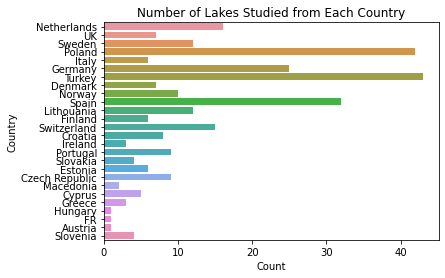

In [17]:
Fig1 = sns.countplot(y='Country', data=ldr)
Fig1.set_title("Number of Lakes Studied from Each Country")
Fig1.set_xlabel("Count")
plt.show()

Figure 1. A count plot of how many lakes from each country were in the dataset.

Figure 1 Analysis: 
This countplot shows that the data is skewed towards lakes from Poland and Germany. It is possible that this may effect the analysis of data, as there could be factors from those country, such as pollution, that may effect the lake cyanobacterial levels.

<AxesSubplot:xlabel='Concentration of total phosphorus (mgL)', ylabel='Concentration of cyanobacterial hepatotoxin microcystin YR (ugL)'>

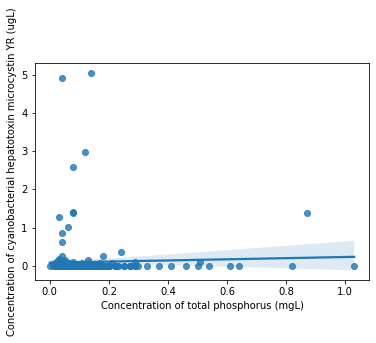

In [18]:
sns.regplot(x='Concentration of total phosphorus (mgL)', y='Concentration of cyanobacterial hepatotoxin microcystin YR (ugL)', data=ldr)

Figure 2. A scatterplot of the concentration of cyanobacterial hepatotoxin microcystin YR in ugL versus the concentration of total phosphorous in mgL. 

Figure 2 Analysis: 
This scatterplot shows that there is very slight positive correlation between the concentration of cyanobacterial hepatotoxin microcystin YR and the concentration of total phosphorous. 

<AxesSubplot:xlabel='Concentration of total phosphorus (mgL)', ylabel='Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL)'>

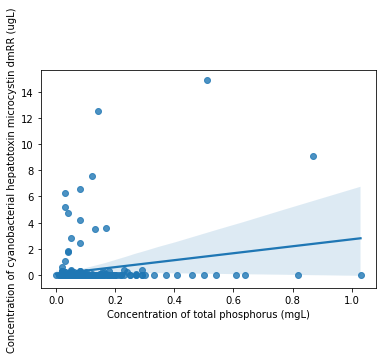

In [27]:
sns.regplot(x='Concentration of total phosphorus (mgL)', y='Concentration of cyanobacterial hepatotoxin microcystin dmRR (ugL)', data=ldr)

Figure 3. A scatterplot of the concentration of cyanobacterial hepatotoxin microcystin dmRR in ugL versus the concentration of total phosphorous in mgL. 

Figure 3 Analysis: 
This scatterplot shows that there is small positive correlation between the concentration of cyanobacterial hepatotoxin microcystin dmRR and the concentration of total phosphorous. 

<AxesSubplot:xlabel='Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL)', ylabel='Concentration of total phosphorus (mgL)'>

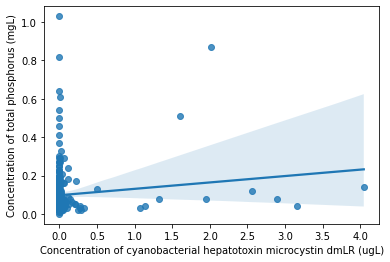

In [28]:
sns.regplot(x='Concentration of cyanobacterial hepatotoxin microcystin dmLR (ugL)', y='Concentration of total phosphorus (mgL)', data=ldr)

Figure 4. A scatterplot of the concentration of cyanobacterial hepatotoxin microcystin dmLR in ugL versus the concentration of total phosphorous in mgL. 

Figure 4 Analysis: 
This scatterplot shows that there is small positive correlation between the concentration of cyanobacterial hepatotoxin microcystin dmLR and the concentration of total phosphorous. 

<AxesSubplot:xlabel='Concentration of total phosphorus (mgL)', ylabel='Concentration of cyanobacterial hepatotoxin microcystin RR (ugL)'>

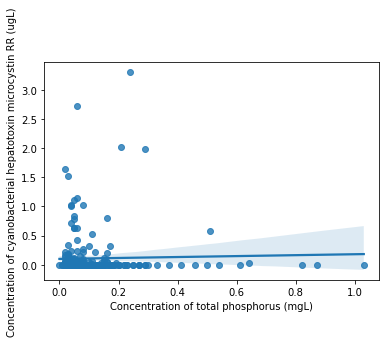

In [29]:
sns.regplot(x='Concentration of total phosphorus (mgL)', y='Concentration of cyanobacterial hepatotoxin microcystin RR (ugL)', data=ldr)

Figure 5. A scatterplot of the concentration of cyanobacterial hepatotoxin microcystin RR in ugL versus the concentration of total phosphorous in mgL. 

Figure 5 Analysis: 
This scatterplot shows that there is no correlation between the concentration of cyanobacterial hepatotoxin microcystin RR and the concentration of total phosphorous. 

<AxesSubplot:xlabel='Concentration of total phosphorus (mgL)', ylabel='Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)'>

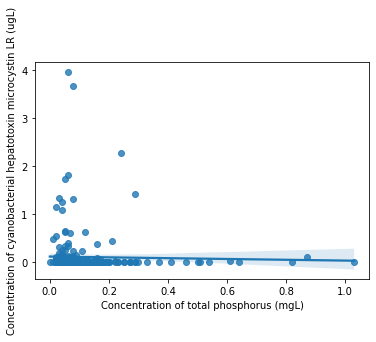

In [30]:
sns.regplot(x='Concentration of total phosphorus (mgL)', y='Concentration of cyanobacterial hepatotoxin microcystin LR (ugL)', data=ldr)

Figure 6. A scatterplot of the Concentration of cyanobacterial hepatotoxin microcystin LR in ugL versus the concentration of total phosphorous in mgL. 

Figure 6 Analysis: 
This scatterplot shows that there is almost no correlation between the concentration of cyanobacterial hepatotoxin microcystin LR and the concentration of total phosphorous. There is a slight negative correlation, but it is barely visible.

### Conclusions
There does not seem to be a consistent correlation between cyanobacterial hepatotoxin levels and phosphorous concentration. Some hepatotoxins have a slight positive correlation, one has no correlation and one has almost no correlation (but does show a slight negative correlation). 